# Modelo con Sobredispersion Poisson (Publicaciones de PhDs en bioquímica)

### Oscar Julian Layton

Publicaciones de Doctpres en Bioquímica, donde las variables son:

* **$Y_k$= art**: El número de articulos publicados en los últimos tres años fem.
* **género del estudiante**: (femenino o masculino)
* **mar**: estado marital del estudiante: (soltero o casado)
* **kid5**: número de hijos de 5 años de edad o menores
* **phd**: Nivel de prestigio del programa de doctorado que cursó.
* **ment**: Número de articulos publicados por el director de tesis en los últimos tres años. 

In [9]:
rm(list=ls())
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")  #Asignando capeta busqueda por default
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [10]:
###################### Lectura de los datos ######################
data(bioChemists,package="pscl")
str(bioChemists)
head(bioChemists)

'data.frame':	915 obs. of  6 variables:
 $ art : int  0 0 0 0 0 0 0 0 0 0 ...
 $ fem : Factor w/ 2 levels "Men","Women": 1 2 2 1 2 2 2 1 1 2 ...
 $ mar : Factor w/ 2 levels "Single","Married": 2 1 1 2 1 2 1 2 1 2 ...
 $ kid5: num  0 0 0 1 0 2 0 2 0 0 ...
 $ phd : num  2.52 2.05 3.75 1.18 3.75 ...
 $ ment: int  7 6 6 3 26 2 3 4 6 0 ...
 - attr(*, "datalabel")= chr "Academic Biochemists / S Long"
 - attr(*, "time.stamp")= chr "30 Jan 2001 10:49"
 - attr(*, "formats")= chr  "%9.0g" "%9.0g" "%9.0g" "%9.0g" ...
 - attr(*, "types")= int  98 98 98 98 102 98
 - attr(*, "val.labels")= chr  "" "sexlbl" "marlbl" "" ...
 - attr(*, "var.labels")= chr  "Articles in last 3 yrs of PhD" "Gender: 1=female 0=male" "Married: 1=yes 0=no" "Number of children < 6" ...
 - attr(*, "version")= int 6
 - attr(*, "label.table")=List of 6
  ..$ marlbl: Named num  0 1
  .. ..- attr(*, "names")= chr  "Single" "Married"
  ..$ sexlbl: Named num  0 1
  .. ..- attr(*, "names")= chr  "Men" "Women"
  ..$       : NULL
  ..$

art,fem,mar,kid5,phd,ment
0,Men,Married,0,2.52,7
0,Women,Single,0,2.05,6
0,Women,Single,0,3.75,6
0,Men,Married,1,1.18,3
0,Women,Single,0,3.75,26
0,Women,Married,2,3.59,2


In [11]:
###################### Estimación del modelo ######################
fit11 <- glm(art ~ fem + mar + kid5 + phd + ment, family=poisson(link="log"), data=bioChemists)
fit12 <- glm(art ~ fem + mar + kid5 + phd + ment, family=poisson(link="identity"), data=bioChemists)
fit13 <- glm(art ~ fem + mar + kid5 + phd + ment, family=poisson(link="sqrt"), data=bioChemists)

In [12]:
###################### Valores del AIC y BIC ######################
AIC(fit11,fit12,fit13)
BIC(fit11,fit12,fit13)

,df,AIC
fit11,6,3314.113
fit12,6,3290.954
fit13,6,3299.727


,df,BIC
fit11,6,3343.026
fit12,6,3319.867
fit13,6,3328.641


Se establece que el mejor modelo en terminos de AIC, BIC es la que tiene función de enlace Identidad.

In [17]:
###################### Resumen del modelo seleccionado ######################
summary(fit12)
gof_glm(fit12)


Call:
glm(formula = art ~ fem + mar + kid5 + phd + ment, family = poisson(link = "identity"), 
    data = bioChemists)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6789  -1.4607  -0.3622   0.5819   5.3712  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.160633   0.160321   7.239 4.51e-13 ***
femWomen    -0.318554   0.086570  -3.680 0.000233 ***
marMarried   0.252454   0.098816   2.555 0.010626 *  
kid5        -0.259634   0.057965  -4.479 7.49e-06 ***
phd          0.015822   0.042982   0.368 0.712788    
ment         0.067419   0.005897  11.433  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1817.4  on 914  degrees of freedom
Residual deviance: 1611.2  on 909  degrees of freedom
AIC: 3291

Number of Fisher Scoring iterations: 6



  Family:  poisson 
    Link:  identity 
                                                     Df     Value
Residual deviance                                   909 1611.2119
Pearson's statistic                                 909 1654.3378
Adjusted R-squared based on the residual deviance          0.1086
Adjusted R-squared based on the Pearson's statistic        0.1695
-2*log-Likelihood                                       3278.9536
AIC                                                     3290.9536
BIC                                                     3319.8671




En este punto se puede decir que: 

* Las mujeres publcan menos que los hombres. 
* Que el numero esperado de publicaciones en casados en mayor que en los solteros.
* Que cuando mayor cantidad de niños menores de 5 años se espera un número menor de publicaciones.
* Que cuando mayor sea el prestigio del doctorado se espera que sea mayor el número de publicaciones.
* Cuando mayor sea el número de articulos publicados por el director de tesis, mayor articulos se espera tener.

In [18]:
1611.2119/909

[1] 1.77251

Conocemos que en el caso de la Poisson el $\phi$ es conocido y es 1. No obstante para conocer $\phi$ estimamos mediante:

$$\widehat{\phi}= \frac{D(y; \widehat{\mu})}{n-p}$$

Se logra observar que hay indicios de sobredispersión, asi como se muestra en el siguiente ENVELOPE. 

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


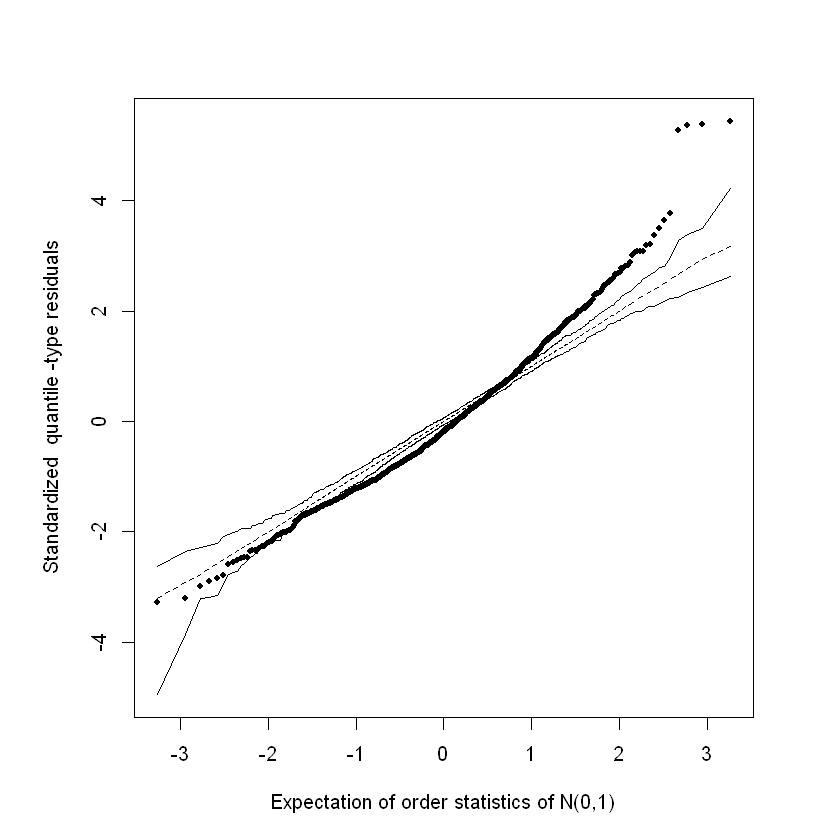

In [19]:
envelope_glm(fit12,rep=100)

## Otra forma de atacar el problema BinomialNegativaI

Ajustando un modelo Binomial Negativo se tiene:

In [20]:
###################### Estimación del modelo ######################
fit21 <- overglm(art ~ fem + mar + kid5 + phd + ment, family="nb1(log)", data=bioChemists)
fit22 <- overglm(art ~ fem + mar + kid5 + phd + ment, family="nb1(identity)", data=bioChemists)
fit23 <- overglm(art ~ fem + mar + kid5 + phd + ment, family="nb1(sqrt)", data=bioChemists)
AIC(fit21,fit22,fit23)
BIC(fit21,fit22,fit23)


Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"



  Family:  Negative Binomial I 
Predictor:  1 + fem + mar + kid5 + phd + ment 

 Object     Link -2*log-likelihood df     AIC 
  fit21      log          3121.917  7 3135.917
  fit22 identity          3110.320  7 3124.320
  fit23     sqrt          3115.001  7 3129.001


  Family:  Negative Binomial I 
Predictor:  1 + fem + mar + kid5 + phd + ment 

 Object     Link -2*log-likelihood df     BIC 
  fit21      log          3121.917  7 3169.649
  fit22 identity          3110.320  7 3158.053
  fit23     sqrt          3115.001  7 3162.733


Se observa por medio del AIC, BIC que la mejor función de enlace es la identidad.

In [30]:
summary(fit22)


Sample size:  915 
     Family:  Negative Binomial I
       Link:  identity
 *************************************************************
            Estimate Std.Error  z-value   Pr(>|z|)
(Intercept)  1.09345   0.21053  5.19390 2.0593e-07
femWomen    -0.29630   0.11411 -2.59672 0.00941179
marMarried   0.25538   0.12777  1.99881 0.04562925
kid5        -0.24980   0.07583 -3.29435 0.00098649
phd          0.02401   0.05489  0.43738 0.66183221
ment         0.07107   0.00918  7.73786 1.0111e-14

            Estimate Std.Error
Dispersion   0.42573   0.05217
 *************************************************************
                 -2*log-likelihood:  3110.32 
                               AIC:  3124.32 
                               BIC:  3158.053 


Comparando con los parámetros de la Poisson con respecto a la Binomial Negativa, se logra observar que los parámetros no cambian tanto sin embargo son menores 0.16 ; -0,31 ; 0.25 ; -0.25 ; 0.01 ; 0.06 (muy parecidos). en cuanto a los errores estandar de la Poisson son:   0.16 ; 0,08 ; 0.09 ; 0.05 ; 0.04 ; 0.005 es decir que se estaban subestimando (en la realidad deberian ser mayores). En cuanto a la significancia *phd* sigue siendo no significativo el de casado ya no es tan significativo.


**"El envelope para la Binomial Negativa no está hecho."**


## Otra forma de atacar el problema BinomialNegativoII

In [35]:
fit31 <- overglm(art ~ fem + mar + kid5 + phd + ment, family="nb2(log)", data=bioChemists)
fit33 <- overglm(art ~ fem + mar + kid5 + phd + ment, family="nb2(sqrt)", data=bioChemists)
AIC(fit31,fit33)
BIC(fit31,fit33)



  Family:  Negative Binomial II 
Predictor:  1 + fem + mar + kid5 + phd + ment 

 Object Link -2*log-likelihood df     AIC 
  fit31  log          3129.397  7 3143.397
  fit33 sqrt          3120.665  7 3134.665


  Family:  Negative Binomial II 
Predictor:  1 + fem + mar + kid5 + phd + ment 

 Object Link -2*log-likelihood df     BIC 
  fit31  log          3129.397  7 3177.130
  fit33 sqrt          3120.665  7 3168.398


Segun el AIC, BIC el mejor modelo es Negative Binomial II enlace raiz cuadrada

## Otra forma a subdispersión es PoissonNormalInversa

In [22]:
fit41 <- overglm(art ~ fem + mar + kid5 + phd + ment, family="poig(log)", data=bioChemists)
fit42 <- overglm(art ~ fem + mar + kid5 + phd + ment, family="poig(identity)", data=bioChemists)
fit43 <- overglm(art ~ fem + mar + kid5 + phd + ment, family="poig(sqrt)", data=bioChemists)
AIC(fit41,fit42,fit43)
BIC(fit41,fit42,fit43)



  Family:  Poisson-Inverse.Gaussian 
Predictor:  1 + fem + mar + kid5 + phd + ment 

 Object     Link -2*log-likelihood df     AIC 
  fit41      log          3536.501  7 3550.501
  fit42 identity          3528.149  7 3542.149
  fit43     sqrt          3531.854  7 3545.854


  Family:  Poisson-Inverse.Gaussian 
Predictor:  1 + fem + mar + kid5 + phd + ment 

 Object     Link -2*log-likelihood df     BIC 
  fit41      log          3536.501  7 3584.234
  fit42 identity          3528.149  7 3575.882
  fit43     sqrt          3531.854  7 3579.586


Segun el AIC, BIC el mejor modelo es Poisson-Inverse.Gaussian enlace identidad.

Para seleccionar el mejor modelo se realiza el AIC, BIC

In [36]:
AIC(fit22,fit33,fit42,fit12)
BIC(fit22,fit33,fit42,fit12)


Predictor:  1 + fem + mar + kid5 + phd + ment 

 Object                   Family     Link -2*log-likelihood df     AIC 
  fit22      Negative Binomial I identity          3110.320  7 3124.320
  fit33     Negative Binomial II     sqrt          3120.665  7 3134.665
  fit42 Poisson-Inverse.Gaussian identity          3528.149  7 3542.149
  fit12                  Poisson identity          3278.954  6 3290.954

Predictor:  1 + fem + mar + kid5 + phd + ment 

 Object                   Family     Link -2*log-likelihood df     BIC 
  fit22      Negative Binomial I identity          3110.320  7 3158.053
  fit33     Negative Binomial II     sqrt          3120.665  7 3168.398
  fit42 Poisson-Inverse.Gaussian identity          3528.149  7 3575.882
  fit12                  Poisson identity          3278.954  6 3319.867


El mejor modelo que se ajusta a las observaciones y que corrige el problema de sobredispersion es Negative Binomial I con enlace identity, no obstante el pero modelo es el Poisson-Inverse.Gaussian identity  

In [25]:
###################### Test de Wald ######################
fit221 <-  overglm(art ~ fem + mar + kid5 + ment, family="nb1(identity)", data=bioChemists)
anova_glm(fit221,fit22,test="wald")

Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"


  Wald test 

 Model 1:  art ~ fem + mar + kid5 + phd + ment 
 Model 2:  art ~ fem + mar + kid5 + ment 

    Chi    Df   Pr(>Chi)
  0.19131   1     0.6618


In [26]:
###################### Test de score ######################
anova_glm(fit221,fit22,test="score")


  Rao's score test 

 Model 1:  art ~ fem + mar + kid5 + phd + ment 
 Model 2:  art ~ fem + mar + kid5 + ment 

    Chi    Df   Pr(>Chi)
  0.19137   1     0.6618


In [27]:
###################### Test de razón de verosimilitudes ######################
anova_glm(fit221,fit22,test="lrt")


  Likelihood-ratio test 

 Model 1:  art ~ fem + mar + kid5 + phd + ment 
 Model 2:  art ~ fem + mar + kid5 + ment 

    Chi    Df   Pr(>Chi)
  0.19125   1     0.6619


In [28]:
###################### Test gradiente ######################
anova_glm(fit221,fit22,test="gradient")


  Gradient test 

 Model 1:  art ~ fem + mar + kid5 + phd + ment 
 Model 2:  art ~ fem + mar + kid5 + ment 

   Chi    Df   Pr(>Chi)
  0.1912   1     0.6619


In [33]:
summary(fit221)


Sample size:  915 
     Family:  Negative Binomial I
       Link:  identity
 *************************************************************
            Estimate Std.Error  z-value   Pr(>|z|)
(Intercept)  1.16352   0.13815  8.42244 < 2.22e-16
femWomen    -0.29403   0.11400 -2.57922 0.00990246
marMarried   0.25131   0.12743  1.97220 0.04858650
kid5        -0.25123   0.07570 -3.31855 0.00090487
ment         0.07183   0.00902  7.96428 1.6619e-15

            Estimate Std.Error
Dispersion   0.42573   0.05217
 *************************************************************
                 -2*log-likelihood:  3110.512 
                               AIC:  3122.512 
                               BIC:  3151.425 


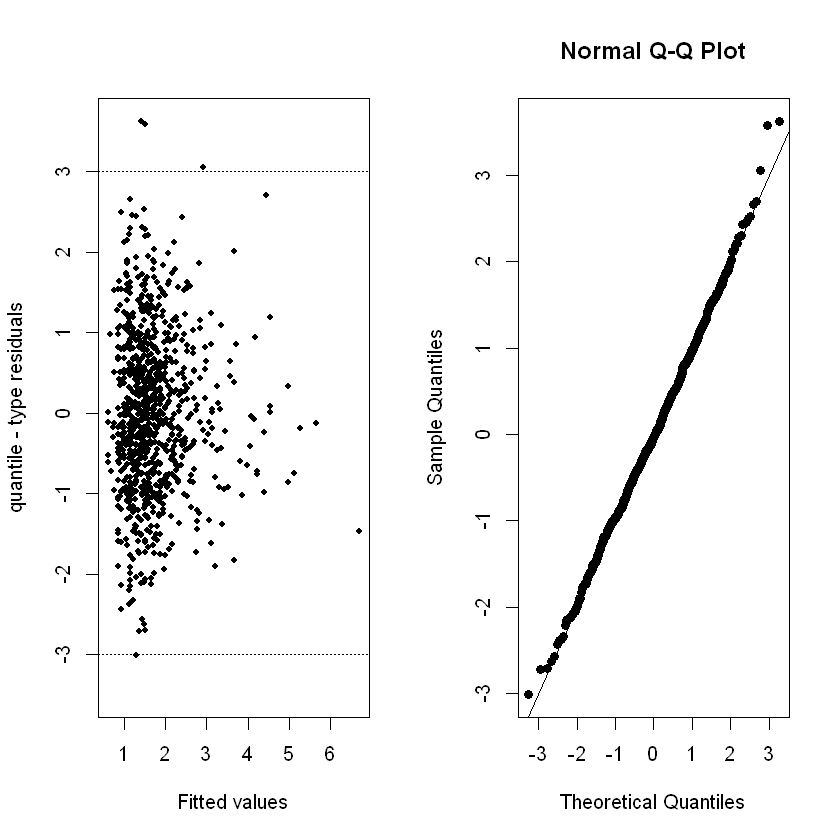

In [31]:
################################# Diagnóstico del modelo seleccionado #################################
###################### Análisis de residuos ######################
par(mfrow=c(1,2))
res <- residuals(fit221,plot=TRUE,type="quantile",identify=1)
qqnorm(res,pch=16)
abline(0,1)

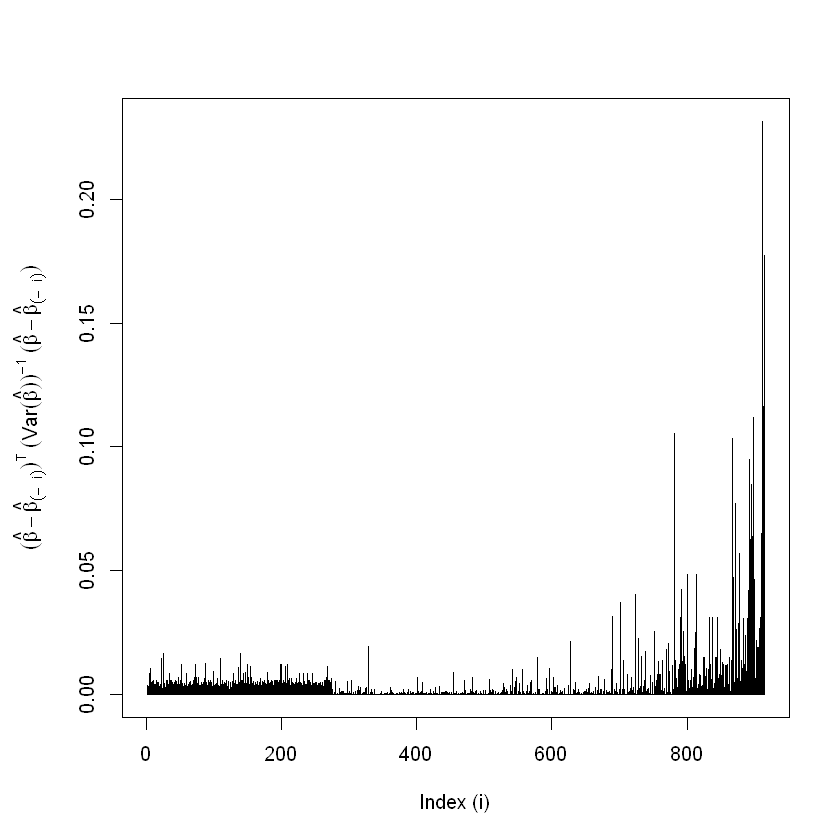

In [34]:
###################### Análisis de sensibilidad ######################
CookDistance(fit221,plot=TRUE,out=FALSE)

In [ ]:
###################### Intervalos de confianza ######################
ci_glm(fit221)

## NOTA:   

Para instalar librerias de R en jupyter notebooks usamos la siguiente linea 

* install.packages("ISLR", "/home/user/anaconda3/lib/R/library")  no usar este comando
* install.packages("sm", "/Users/YULY/anaconda/Lib/R/library")

Para más información verificar el siguiente enlace::

https://www.pythond.com/23094/conda-como-instalar-paquetes-r-que-no-estan-disponibles-en-r-essentials.html

* También puede usarse el siguiente comando desde r para instalar el entorno de r 

install.packages("CASdatasets", "/Users/YULY/anaconda/Lib/R/library",repos = "http://cas.uqam.ca/pub/R/")
